In [5]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt
rm = pyvisa.ResourceManager()
rm.list_resources()
my_instrument = rm.open_resource('USB0::0x0957::0x1790::MY56270939::INSTR',write_termination= '\n', read_termination='\n')
#print(my_instrument.query('*IDN?'))
print(rm)
#The *IDN? query identifies the instrument type and software version.
my_instrument.query('*IDN?')

Resource Manager of Visa Library at C:\Windows\system32\visa32.dll


'AGILENT TECHNOLOGIES,MSO-X 6004A,MY56270939,06.12.2016010702'

In [2]:
#range of the time scale on the oscilloscope
print(my_instrument.query(":TIMebase:RANGe?"))
my_instrument.query(":CHANnel1?")
#my_instrument.write(":AUToscale")
my_instrument.query(":CHANnel1:IMPedance?")
my_instrument.write(":CHANnel1:DISPlay ON")
print("voltage superior "+str(float(my_instrument.query(":MEASure:VTOP? CHANnel1"))))
print("voltage inferior "+str(float(my_instrument.query(":MEASure:VMIN? CHANnel1"))))
#print(my_instrument.query(":MEASure:VTOP? CHANnel1"))
#print(my_instrument.query(":MEASure:VMIN? CHANnel1"))

#funciona pero con el generador de funciones
#print(float(my_instrument.query(":MEASure:BRATe? CHANnel1"))/2)



+20.00E-03
voltage superior 2.92
voltage inferior -0.18


1955


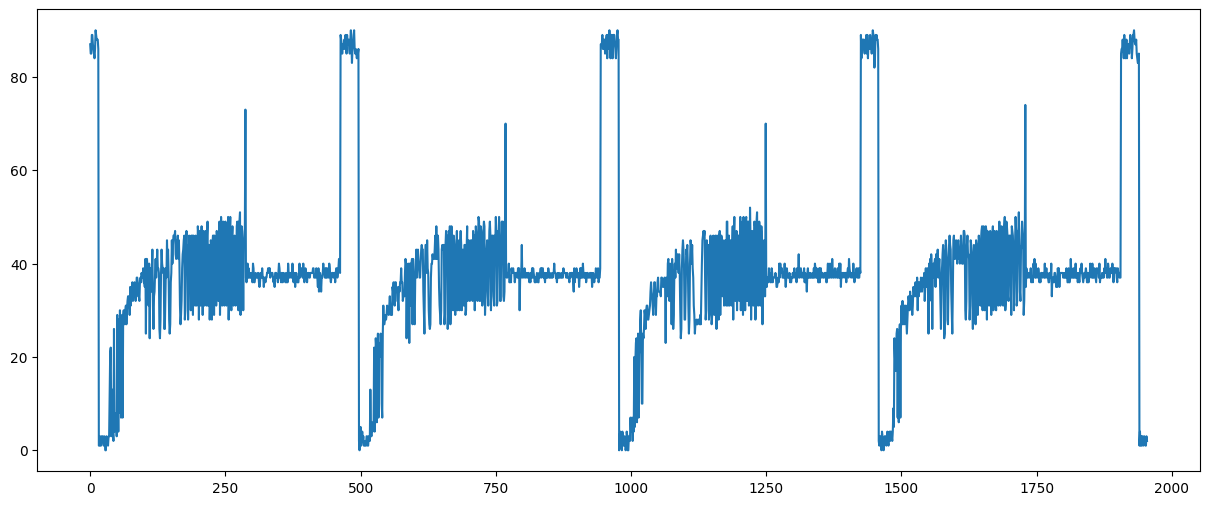

In [140]:
#*CLS clears the status data structures, the device-defined error queue, and the Request-for-OPC flag.
my_instrument.write("*CLS")
my_instrument.write(":ACQuire:TYPE AVERage")
my_instrument.write(":ACQuire:COUNt 3")

my_instrument.write(":ACQuire:TYPE NORMal")

my_instrument.write("WAVeform:SOURce CHANnel1")
my_instrument.write("WAVeform:FORMat WORD")
my_instrument.write("WAVeform:POINts 2000")
my_instrument.write(":SINGle")
values=my_instrument.query_binary_values(":WAVeform:DATA?",datatype="h",container=np.array)
plt.figure(figsize=(15,6))
plt.plot(values)
print(len(values))